<a href="https://colab.research.google.com/github/K-Saritha/ML-LAB/blob/main/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MULTIPLE LINEAR REGRESSION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:

#load iris dataset
iris=load_iris()
print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
iris_df=pd.DataFrame(data=np.c_[iris['data'],iris['target']])
iris_df.columns=['sepal_length','sepal_width','petal_length','petal_width','target']
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2     0.0
1           4.9          3.0           1.4          0.2     0.0
2           4.7          3.2           1.3          0.2     0.0
3           4.6          3.1           1.5          0.2     0.0
4           5.0          3.6           1.4          0.2     0.0


In [ ]:
X=iris_df.iloc[:,:4]
y=iris_df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

print(model.coef_)
print(model.intercept_)

0.050460411073761126
0.9189029107743125
[-0.18372018  0.00377081  0.31350492  0.48824985]
0.31685273942180747


              sepal_length  sepal_width  petal_length  petal_width    target
sepal_length      1.000000    -0.117570      0.871754     0.817941  0.782561
sepal_width      -0.117570     1.000000     -0.428440    -0.366126 -0.426658
petal_length      0.871754    -0.428440      1.000000     0.962865  0.949035
petal_width       0.817941    -0.366126      0.962865     1.000000  0.956547
target            0.782561    -0.426658      0.949035     0.956547  1.000000


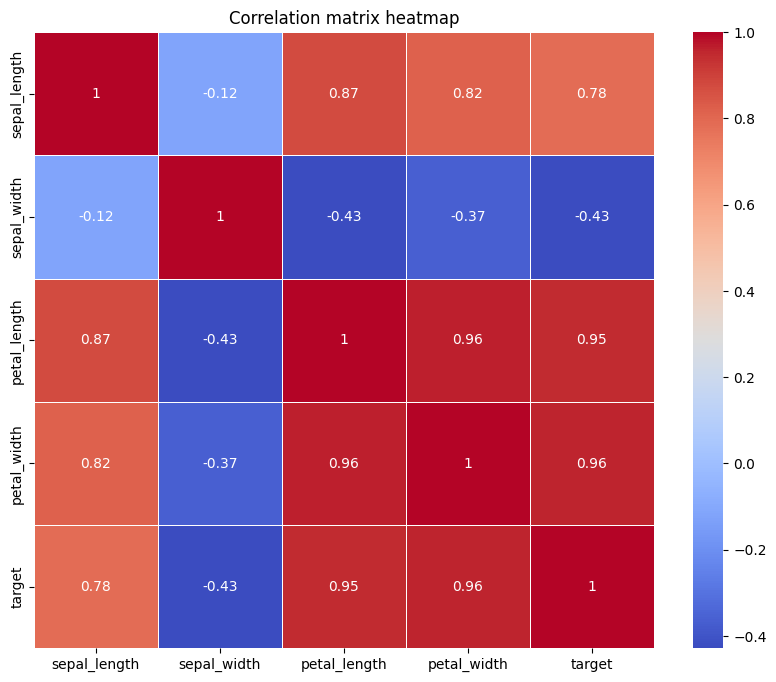

In [ ]:

#compute correlation
correlation_matrix=iris_df.corr()
print(correlation_matrix)
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation matrix heatmap')
plt.show()



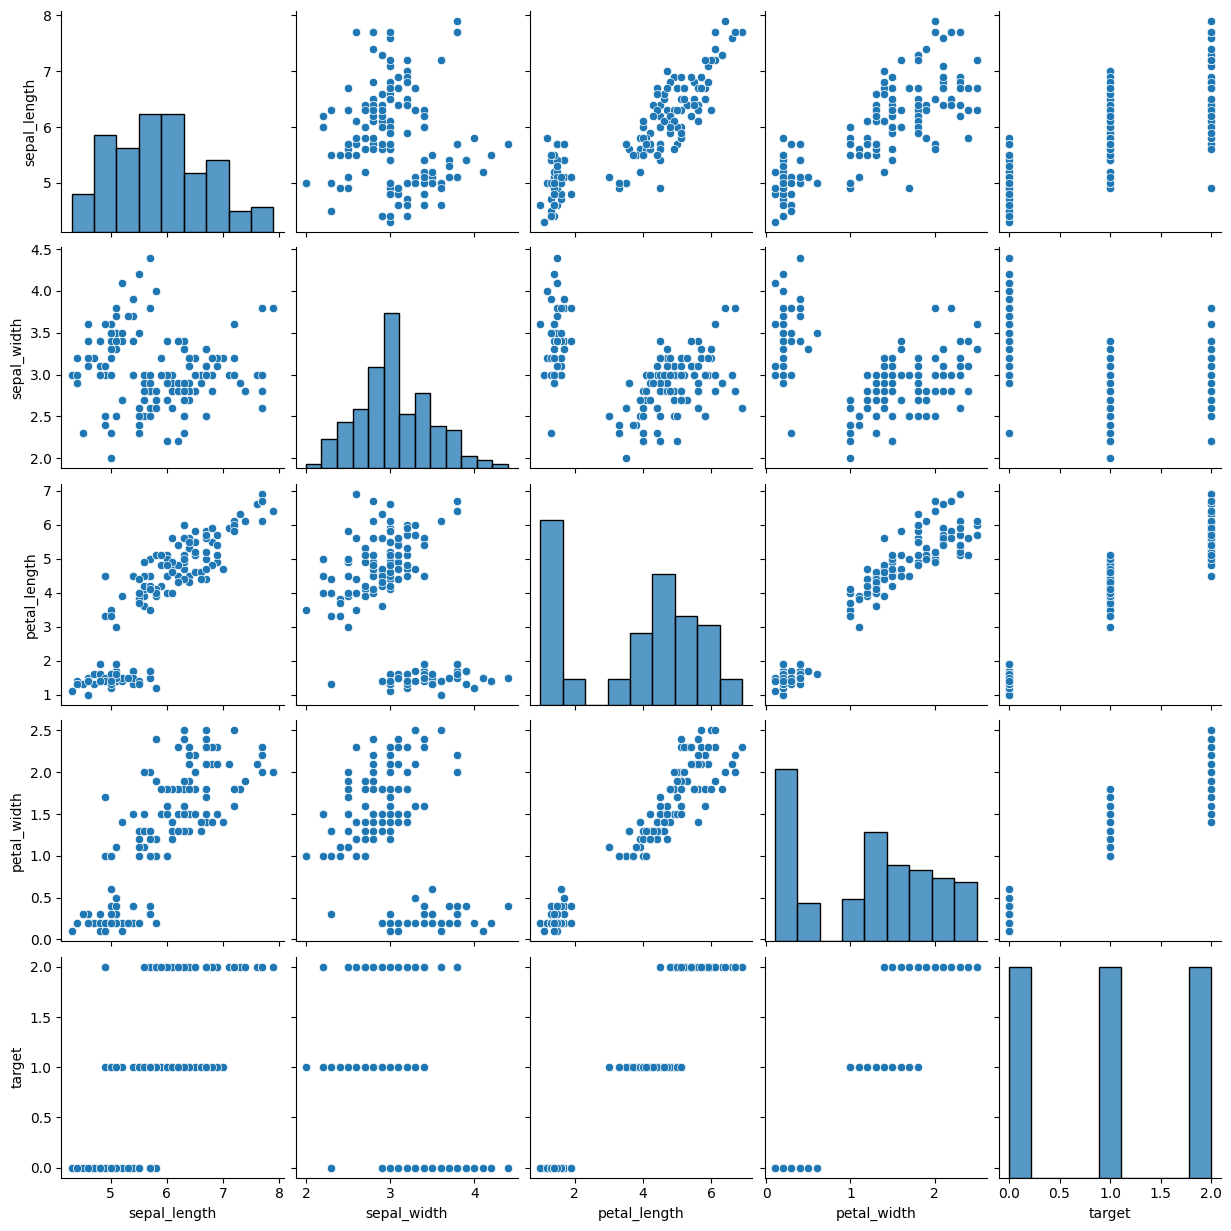

In [ ]:
sns.pairplot(iris_df)
plt.show()

In [ ]:
coorelation_with_target=correlation_matrix['target'].drop('target')
print(coorelation_with_target)

sepal_length    0.782561
sepal_width    -0.426658
petal_length    0.949035
petal_width     0.956547
Name: target, dtype: float64


In [ ]:
#electing fetures based on corelation values
selected_features=['sepal_length','petal_length','petal_width']
X=iris_df[selected_features]
y=iris_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)



0.05036218956363745
0.9190607667727255


In [ ]:
y_pred

array([ 1.18491432,  1.74123879, -0.0938657 ,  1.33250484, -0.05239703,
        0.9935637 ,  1.43862669,  1.03507144, -0.03943074,  1.32489552,
        1.4411965 ,  1.78788616,  1.20562913, -0.03425204,  0.00964726,
        1.82903739,  1.41769456,  0.02536162,  0.05872526, -0.11461957,
        1.89904752,  1.98180661,  1.5728944 ,  0.13944931,  1.29342772,
       -0.02907334,  1.1824837 ,  1.28099622,  1.26771248,  2.08814578,
        1.19270191,  1.17194804,  1.60440126,  2.03327616,  1.66604996,
        0.02018292,  1.90940492,  1.97127095,  2.19944633,  1.78460331,
        0.10798152,  0.20613751,  1.27803081,  0.05629463,  1.42548214])

In [ ]:
#rounding y_pred values
y_pred=np.round(y_pred)


#calculate accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 1.0


In [ ]:
len(y_test)

45

In [ ]:
#print the predictions
for i in range(len(y_test)):
    print("Actual:",y_test.iloc[i],"Predicted:",y_pred[i])

Actual: 1.0 Predicted: 1.0
Actual: 2.0 Predicted: 2.0
Actual: 0.0 Predicted: -0.0
Actual: 1.0 Predicted: 1.0
Actual: 0.0 Predicted: -0.0
Actual: 1.0 Predicted: 1.0
Actual: 1.0 Predicted: 1.0
Actual: 1.0 Predicted: 1.0
Actual: 0.0 Predicted: -0.0
Actual: 1.0 Predicted: 1.0
Actual: 1.0 Predicted: 1.0
Actual: 2.0 Predicted: 2.0
Actual: 1.0 Predicted: 1.0
Actual: 0.0 Predicted: -0.0
Actual: 0.0 Predicted: 0.0
Actual: 2.0 Predicted: 2.0
Actual: 1.0 Predicted: 1.0
Actual: 0.0 Predicted: 0.0
Actual: 0.0 Predicted: 0.0
Actual: 0.0 Predicted: -0.0
Actual: 2.0 Predicted: 2.0
Actual: 2.0 Predicted: 2.0
Actual: 2.0 Predicted: 2.0
Actual: 0.0 Predicted: 0.0
Actual: 1.0 Predicted: 1.0
Actual: 0.0 Predicted: -0.0
Actual: 1.0 Predicted: 1.0
Actual: 1.0 Predicted: 1.0
Actual: 1.0 Predicted: 1.0
Actual: 2.0 Predicted: 2.0
Actual: 1.0 Predicted: 1.0
Actual: 1.0 Predicted: 1.0
Actual: 2.0 Predicted: 2.0
Actual: 2.0 Predicted: 2.0
Actual: 2.0 Predicted: 2.0
Actual: 0.0 Predicted: 0.0
Actual: 2.0 Predicted:

KNN K NUMBER OF NEARET NEIGHBOURS

In [ ]:
point_0=iris_df.iloc[0]
point_1=iris_df.iloc[1]



# Euclidean distance
euclidean_distance = np.linalg.norm(point_0 - point_1)

# Manhattan distance
manhattan_distance = np.sum(np.abs(point_0 - point_1))

# Minkowski distance (general case)

minkowski_distance=np.sum(np.abs(point_0 - point_1) ** 3) ** (1 / 3)


print("Euclidean Distance:", euclidean_distance)
print("Manhattan Distance:", manhattan_distance)
print("Minkowski Distance:", minkowski_distance)




Euclidean Distance: 0.5385164807134502
Manhattan Distance: 0.6999999999999993
Minkowski Distance: 0.5104468722001463


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

#knn classifier


knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

#metrics

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)





0.022222222222222223
0.9642857142857143
Accuracy: 0.9777777777777777
